# Завдання 1, варіант 7. Назаренко Василь
## 1.2)

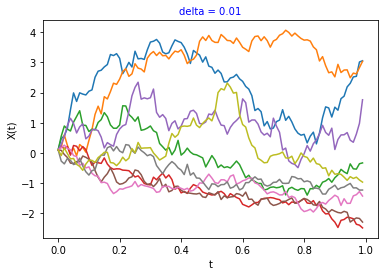

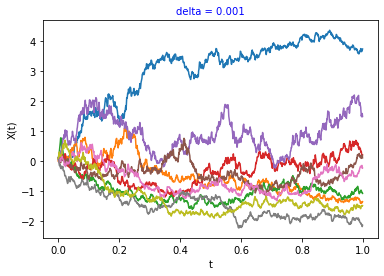

In [125]:
import math
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
x_0 = 0.1

def a(t,x):
    return np.log(1+t)*(2+np.sin(x))

def b(t,x):
    return 2+np.sin(x)

def euler(t, n, x_0):
    delta = t/n # діаметр розбиття\шаг
    #t_k = [i*delta for i in range(0,n) ] 
    t_k = np.arange(0, 1, delta) #одне і теж. В 2й роботі пригодилось
    X_t = [x_0]
    for i in range(1, n):
        dW = np.random.normal(loc=0, scale=np.sqrt(delta), size=1)
            #тут все, начебто, по формулі як треба
        x_temp = X_t[i-1] + a(t_k[i-1],X_t[i-1])*delta + b(t_k[i-1],X_t[i-1])*dW[0]
        X_t.append(x_temp)
    return X_t #Повертає список

#---------------------------------------------------------------Запускаєм-------------------------------------------

t = 1
n = 100


#Строїмо "10 різних траєкторій", на відрізку tє[0,1] з інтервалом 0.01 або 0.001 (П.С. потрібно поміняти n=1000 or n=100 вище)
#будуємо список с t та X(t) (викликаючи метод euler. Всередені містить функцію рандому в dW). Тобто, при кожному проході цикла
#Заново визивається цей метод з новим уже списком значень.
for i in range(1, 10):
    plt.plot([t/n*i for i in range(0,n)], euler(t,n,x_0)) 
    plt.title('delta = 0.01', y=1.0, fontsize=10, c='blue')
    plt.xlabel('t')
    plt.ylabel('X(t)')

#plt.ylim(0, 100)
plt.show()

n = 1000
for i in range(1, 10):
    plt.plot([t/n*i for i in range(0,n)], euler(t,n,x_0)) 
    plt.title('delta = 0.001', y=1.0, fontsize=10, c='blue')
    plt.xlabel('t')
    plt.ylabel('X(t)')

#plt.ylim(0, 100)
plt.show()
    

# Завдання 2
### 2.1 та 2.2
Для 2.1 використаю, якщо можна, формулу з того що порахував на бумазі(надсилав перед цим окремим файлом)

In [171]:
a = 2.1
c = 0.2
theta = a
sigma = c
d = 0
x_0 = 7
deltas = [1/8, 1/16, 1/32]
t = [1, 10, 20]
def clear_view(x_0, theta, sigma, delta, t):
    #delta = t/n
    #t_k = np.arange(0, t, delta)
    X_t = [x_0]
    for i in range(1, len(t_k)):
        dW = np.random.normal(loc=0, scale=np.sqrt(delta), size=1) # (loc=2.1, scale=0.04*t, size=1)
        x_temp = x_0*np.exp(0.2*dW[0] + ((2.1 - (0.2)**2/2)*t))
        X_t.append(x_temp)
    return X_t

from sklearn.metrics import mean_absolute_error

for k in t:
    thousand_way = []
    for delta1 in deltas:
        thousand_way = []
        mae_mean = 0
        res_mean = 0
        for i in range(0, 1000):
            x_i = clear_view(x_0, theta, sigma, delta1, k)
            res_mean += np.std(x_i)/np.sqrt(len(x_i))
            #print("mean", res_mean)
            thousand_way.append(x_i)
        for i in range(1, len(thousand_way)):
            MAE = mean_absolute_error(thousand_way[0],thousand_way[i])
            mae_mean += MAE
            #print("t = ", k, " delta = ", delta1, " MAE = ", MAE)
        print("t = ", k, " delta = ", delta1, " MAE = ", mae_mean/len(thousand_way))
        print("mean", res_mean/1000)



t =  1  delta =  0.125  MAE =  3.8892295716744223
mean 5.878336491431559
t =  1  delta =  0.0625  MAE =  3.0539356816254983
mean 3.0396238629291483
t =  1  delta =  0.03125  MAE =  2.0559326193945844
mean 1.546282681595042
t =  10  delta =  0.125  MAE =  631581771.1439315
mean 111094052.31296016
t =  10  delta =  0.0625  MAE =  437551922.34059644
mean 55720056.79718475
t =  10  delta =  0.03125  MAE =  302610876.2230039
mean 27895414.33728761
t =  20  delta =  0.125  MAE =  6.489848090189649e+17
mean 6.826674058780446e+16
t =  20  delta =  0.0625  MAE =  4.554463785294148e+17
mean 3.4214181441147364e+16
t =  20  delta =  0.03125  MAE =  3.297016025324084e+17
mean 1.7095851600289746e+16


щось не понятне робиться при t=10. Десь помилка, мабуть...

In [187]:
dW = np.random.normal(loc=0, scale=np.sqrt(delta), size=1) # (loc=2.1, scale=0.04*t, size=1)
x_temp = x_0*np.exp(0.2*dW[0] + ((2.1 - (0.2**2)/2)*10))
x_temp

7581282125.26925

In [185]:
2*(1 +(x_0)**2)*1/32

3.125